In [2]:
import numpy as np
from skimage import data, io, filters
import scipy
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [3]:
img1 = (io.imread('Images/Q3/Church.jpg',dtype='float64')/255.0)

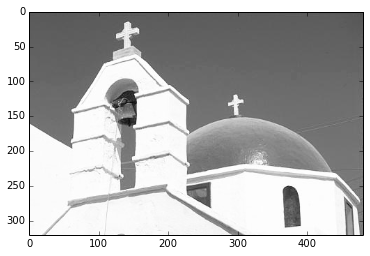

In [4]:
plt.imshow(img1, cmap = cm.Greys_r)
plt.show()

In [5]:
from skimage import filters
import scipy.ndimage as nd

def applySobel(img, threshold):
    edges = filters.sobel(img)
    edges[edges <threshold] = 0
    edges[edges >=threshold] = 1
    return edges

def applyCanny(img,sig, upperThreshold):
    edge = feature.canny(img,sigma = sig, high_threshold = upperThreshold, low_threshold=.3*upperThreshold)
    
    return edge.astype(float)

def applyGaussianLaplace(img,sig,localThreshold):
    img = img.astype(float)
    glImg = nd.gaussian_laplace(img,sig)
    x,y=3,3
    m,n = img.shape
    newImg = np.copy(glImg)
    for i in range(0,m-x+1):
        for j in range(0,n-y+1):
            block = glImg[i:i+x,j:j+y]
            minNo = np.min(block)
            maxNo = np.max(block)
            val = 0.0
            if((minNo*maxNo<0) and np.abs(maxNo-minNo)>=localThreshold):
                val = 1.0
            newImg[i+(x/2),j+(y/2)] = val
    newImg[np.where(newImg!=1.0)] = 0.0            
    return newImg

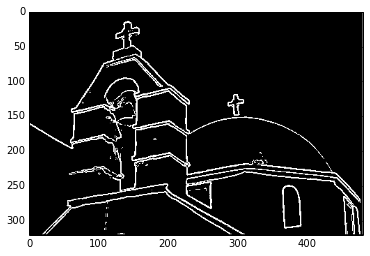

In [140]:
plt.imshow(edges, cmap = cm.Greys_r)
plt.show()

In [283]:
from skimage import feature
edges_canny_1 = applyCanny(img1,.52, .6231)
plt.imshow(img, cmap = cm.Greys_r)
plt.show()


NameError: name 'img' is not defined

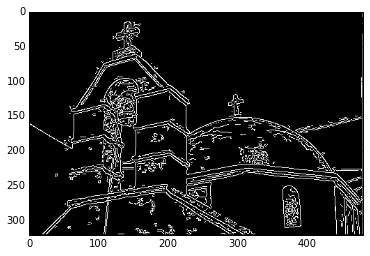

In [136]:
from skimage import feature
edges_canny_2 = feature.canny(img1,sigma=0)
plt.imshow(edges_canny_2, cmap = cm.Greys_r)
plt.show()



In [229]:
edgeLap = applyGaussianLaplace(img1,.9833,.09010)

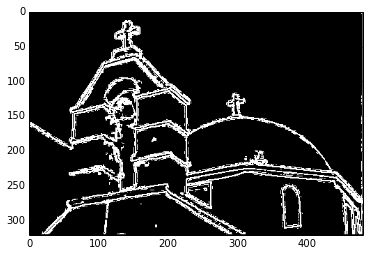

In [230]:
plt.imshow(edgeLap, cmap = cm.Greys_r)
plt.show()



In [227]:
edgeLap = applyGaussianLaplace(img1,2,0.0)

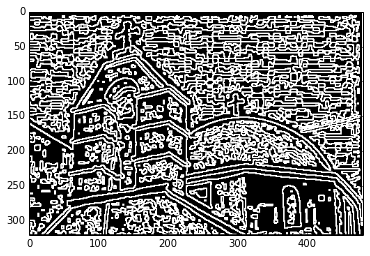

In [228]:
#For zero threshold edges are closed curves because 
plt.imshow(edgeLap, cmap = cm.Greys_r)
plt.show()


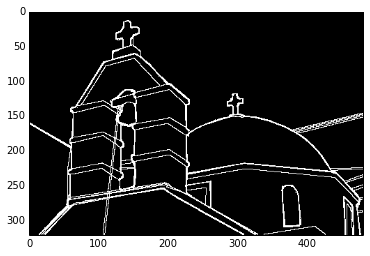

In [9]:
imx = (io.imread('Images/Q3/Church_GT.bmp',dtype='float64'))
plt.imshow(imx, cmap = cm.Greys_r)
plt.show()

In [6]:
#precision = tp/(tp+fp)
#recall = tp/(tp+fn)
def precisionRecallCurve(imgGray, imgGT,sig,method):
    
    tp=0.0;
    fp=0.0;
    fn = 0.0;
    imgGTNonzeropts = np.where(imgGT>0)
    sGT = frozenset(zip(imgGTNonzeropts[0],imgGTNonzeropts[1]))
    img = np.zeros(imgGray.shape)
    precision = []
    recall = []
    threshold = 0.0
    while(1):
        #print threshold
        if method=='sobel':
            img = applySobel(imgGray, threshold)
        elif method == 'glap':
            img = applyGaussianLaplace(imgGray,sig,threshold)
        else:
            applyCanny(imgGray,sig, threshold)
            
        imgNonzeropts = np.where(imgGray>0)
        if(len(imgNonzeropts[0])==0):
            break
            
        sImg = frozenset(zip(imgNonzeropts[0],imgNonzeropts[1]))
        tp = len(sImg.intersection(sGT))
    
        fp = len(sImg)-tp
        fn = len(sGT) - tp
        #print tp,' ',fp,' ',fn
        precision.append(tp/(tp+fp))
        recall.append(tp/(tp+fn))
        threshold += .005

    return (precision,recall)
    

In [251]:
px = np.where(imx>0)

In [214]:
imz = np.zeros((10,10))

In [267]:
pz = np.where(edges_canny_1>0)

In [275]:
s1 = frozenset(zip(px[0],px[1]))
s2 = frozenset(zip(pz[0],pz[1]))

In [280]:
len(s1.intersection(s2))

2470

In [285]:
len(s1)

10011

In [240]:
edges_canny_1[np.where(edges_canny_1==False)] 

(array([  0,   0,   0, ..., 320, 320, 320]),
 array([  0,   1,   2, ..., 478, 479, 480]))

In [241]:
edges_canny_1.astype(float)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  1., ...,  1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [248]:
zip(imgNonzeropts)

NameError: name 'imgNonzeropts' is not defined

In [ ]:
pr1,r1 = precisionRecallCurve(img1, imx,2.0,'canny')

In [10]:
pr2,r2 = precisionRecallCurve(img1, imx,2.0,'sobel')

KeyboardInterrupt: 

In [ ]:
pr3,r3 = precisionRecallCurve(img1, imx,2.0,'glap')